In [15]:
import pickle
import lzma

with lzma.open('params_k=20_2024-05-02 11:05:36.932319.xz', 'rb') as f:
    params = pickle.load(f)

In [16]:
locals().update(params)

In [16]:
with lzma.open('movie_data_movielens.xz', 'rb') as f:
    train_movie_ratings_list, test_movie_ratings_list = pickle.load(f)

with lzma.open('user_data_movielens.xz', 'rb') as f:
    train_user_ratings_list, test_user_ratings_list = pickle.load(f)

In [18]:
import numpy as np

def arraylize(input_list):
    return [np.array(val) for val in input_list]

train_movie_ratings_list = arraylize(train_movie_ratings_list)
test_movie_ratings_list = arraylize(test_movie_ratings_list)
train_user_ratings_list = arraylize(train_user_ratings_list)
test_user_ratings_list = arraylize(test_user_ratings_list)

In [19]:
from tqdm.notebook import tqdm
import numpy as np

M = len(train_user_ratings_list)
N = len(train_movie_ratings_list)

for i in tqdm(range(n_epochs)):
    for m in range(M):
        # Extract ratings and indices for the current user
        if len(train_user_ratings_list) > 0:
            ratings = train_user_ratings_list[m][:, 1]
            indices = train_user_ratings_list[m][:, 0].astype(int)
            
            # Calculate user bias
            user_bias = lmb * np.sum(ratings - np.einsum('i,ji->j', U[m], V[indices]) - item_biases[indices]) / (lmb * len(indices) + gamma)
            user_biases[m] = user_bias
            
            # Calculate left and right matrices for user factor update
            left = np.sum(np.einsum('ij,il->ijl', V[indices], V[indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', V[indices], ratings - user_bias - item_biases[indices]), axis=0)
            
            # Update user factor
            U[m] = np.linalg.solve(lmb * left + tau * np.eye(k), lmb * right)

    for n in range(N):
        # Extract ratings and indices for the current item
        if len(train_movie_ratings_list[n]) > 0:
            ratings = train_movie_ratings_list[n][:, 1]
            indices = train_movie_ratings_list[n][:, 0].astype(int)
            
            # Calculate item bias
            item_bias = lmb * np.sum(ratings - np.einsum('ij,j->i', U[indices], V[n]) - user_biases[indices]) / (lmb * len(indices) + gamma)
            item_biases[n] = item_bias
            
            # Calculate left and right matrices for item factor update
            left = np.sum(np.einsum('ij,il->ijl', U[indices], U[indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', U[indices], ratings - user_biases[indices] - item_bias), axis=0)
            
            # Update item factor
            V[n] = np.linalg.solve(lmb * left + tau * np.eye(k), lmb * right)

    # Calculate loss and RMSE
    train_error_squared = 0
    train_size = 0
    test_error_squared = 0
    test_size = 0
    
    for m in range(M):
        if len(train_user_ratings_list[m]) > 0:
            train_ratings = train_user_ratings_list[m][:, 1]
            train_indices = train_user_ratings_list[m][:, 0].astype(int)
            train_error_squared += np.sum((train_ratings - np.einsum('i,ji->j', U[m], V[train_indices]) - user_biases[m] - item_biases[train_indices])**2)
            train_size += len(train_indices)
            
        if len(test_user_ratings_list[m]) > 0:
            test_ratings = test_user_ratings_list[m][:, 1]
            test_indices = test_user_ratings_list[m][:, 0].astype(int)
            test_error_squared += np.sum((test_ratings - np.einsum('i,ji->j', U[m], V[test_indices]) - user_biases[m] - item_biases[test_indices])**2)
            test_size += len(test_indices)
        
    train_loss = -0.5 * lmb * train_error_squared - 0.5 * gamma * np.sum(user_biases**2) - 0.5 * gamma * np.sum(item_biases**2) - 0.5 * tau * (np.einsum('ij,ij->', V, V) + np.einsum('ij,ij->', U, U))
    train_rmse = np.sqrt(1 / train_size * train_error_squared)
    
    train_losses.append(-1*train_loss)
    train_rmses.append(train_rmse)

    test_loss = -0.5 * lmb * test_error_squared - 0.5 * gamma * np.sum(user_biases**2) - 0.5 * gamma * np.sum(item_biases**2) - 0.5 * tau * (np.einsum('ij, ij->', V, V) + np.einsum('ij, ij->', U, U))
    test_rmse = np.sqrt(1/test_size * test_error_squared)
    
    test_losses.append(-1*test_loss)
    test_rmses.append(test_rmse)
        
    print(f'train loss {round(-1*train_loss, 2)} test loss {round(-1*test_loss, 2)} train rmse {round(train_rmse, 4)} test rmse {round(test_rmse, 4)}')

  0%|          | 0/100 [00:00<?, ?it/s]

train loss 4100756.55 test loss 1988028.55 train rmse 0.6364 test rmse 0.8804
train loss 4094735.63 test loss 1987648.86 train rmse 0.636 test rmse 0.8804
train loss 4089280.14 test loss 1987506.13 train rmse 0.6356 test rmse 0.8805
train loss 4084320.49 test loss 1987586.31 train rmse 0.6352 test rmse 0.8806
train loss 4079797.33 test loss 1987862.04 train rmse 0.6349 test rmse 0.8807
train loss 4075659.62 test loss 1988309.16 train rmse 0.6346 test rmse 0.8809
train loss 4071863.49 test loss 1988922.38 train rmse 0.6343 test rmse 0.8812
train loss 4068371.07 test loss 1989697.1 train rmse 0.6341 test rmse 0.8814
train loss 4065149.49 test loss 1990592.88 train rmse 0.6338 test rmse 0.8817
train loss 4062169.57 test loss 1991565.85 train rmse 0.6336 test rmse 0.882
train loss 4059406.0 test loss 1992580.29 train rmse 0.6334 test rmse 0.8823
train loss 4056836.31 test loss 1993617.55 train rmse 0.6333 test rmse 0.8826
train loss 4054440.56 test loss 1994668.83 train rmse 0.6331 test rm

KeyboardInterrupt: 

In [1]:
import pickle
import lzma

with lzma.open('params_k=10_2024-05-03 18:21:27.921264.xz', 'rb') as f:
    params_10 = pickle.load(f)
with lzma.open('params_k=2_2024-05-03 13:10:28.792605.xz', 'rb') as f:
    params_2 = pickle.load(f)

In [17]:
# train_losses_10 = params_2['train_losses']
# test_losses_10 = params_2['test_losses']
train_rmse_10 = params_10['train_rmses']
test_rmse_10 = params_10['test_rmses']
train_rmse_2 = params_2['train_rmses']
test_rmse_2 = params_2['test_rmses']
train_rmses = train_rmses + [0.6364, 0.636, 0.6356, 0.6352, 0.6349, 0.6346, 0.6343, 0.6341, 0.6338, 0.6336, 0.6334, 0.6333, 0.6331, 0.6329, 0.6328, 0.6327, 0.6325, 0.6324, 0.6323, 0.6322, 0.6321, 0.632, 0.6319, 0.6318, 0.6318, 0.6317, 0.6316, 0.6315, 0.6315, 0.6314, 0.6314, 0.6313, 0.6312, 0.6312, 0.6311, 0.6311, 0.631, 0.631, 0.631, 0.6309, 0.6309, 0.6308, 0.6308, 0.6308, 0.6307, 0.6307, 0.6307, 0.6306, 0.6306, 0.6306, 0.6305, 0.6305, 0.6305, 0.6305, 0.6304, 0.6304, 0.6304, 0.6304, 0.6303, 0.6303, 0.6303, 0.6303, 0.6303, 0.6302, 0.6302, 0.6302, 0.6302, 0.6302, 0.6302, 0.6301, 0.6301, 0.6301, 0.6301, 0.6301, 0.6301]
test_rmses = test_rmses + [0.8804, 0.8804, 0.8805, 0.8806, 0.8807, 0.8809, 0.8812, 0.8814, 0.8817, 0.882, 0.8823, 0.8826, 0.8829, 0.8832, 0.8835, 0.8838, 0.8841, 0.8844, 0.8847, 0.885, 0.8854, 0.8857, 0.886, 0.8863, 0.8866, 0.8869, 0.8872, 0.8875, 0.8878, 0.8881, 0.8884, 0.8887, 0.889, 0.8893, 0.8896, 0.8899, 0.8902, 0.8905, 0.8908, 0.8911, 0.8914, 0.8916, 0.8919, 0.8922, 0.8925, 0.8928, 0.893, 0.8933, 0.8936, 0.8938, 0.8941, 0.8944, 0.8946, 0.8949, 0.8951, 0.8954, 0.8956, 0.8959, 0.8961, 0.8963, 0.8966, 0.8968, 0.897, 0.8972, 0.8975, 0.8977, 0.8979, 0.8981, 0.8983, 0.8985, 0.8987, 0.899, 0.8992]

In [21]:
len(train_rmse_2)

87

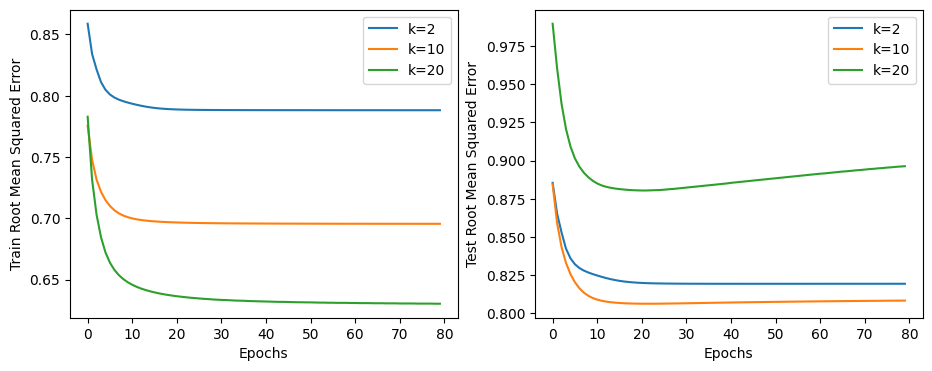

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(11, 4))
ax[0].plot(train_rmse_2[:80], label='k=2')
ax[0].plot(train_rmse_10[:80], label='k=10')
ax[0].plot(train_rmses[:80], label='k=20')
# ax[0].set_title('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Train Root Mean Squared Error')
# ax[0].set_ylim(min(train_rmse_2+train_rmse_10+train_rmses+test_rmse_2+test_rmse_10+test_rmses), max(train_rmse_2+train_rmse_10+train_rmses+test_rmse_2+test_rmse_10+test_rmses))
ax[0].legend()
ax[1].plot(test_rmse_2[:80], label='k=2')
ax[1].plot(test_rmse_10[:80], label='k=10')
ax[1].plot(test_rmses[:80], label='k=20')
# ax[1].set_ylim(min(train_rmse_2+train_rmse_10+train_rmses+test_rmse_2+test_rmse_10+test_rmses), max(train_rmse_2+train_rmse_10+train_rmses+test_rmse_2+test_rmse_10+test_rmses))
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Test Root Mean Squared Error')
# ax[1].set_title('Root Mean Squared Error')
ax[1].legend()
# plt.show()
plt.savefig('comparison_rmse.pdf', bbox_inches='tight')

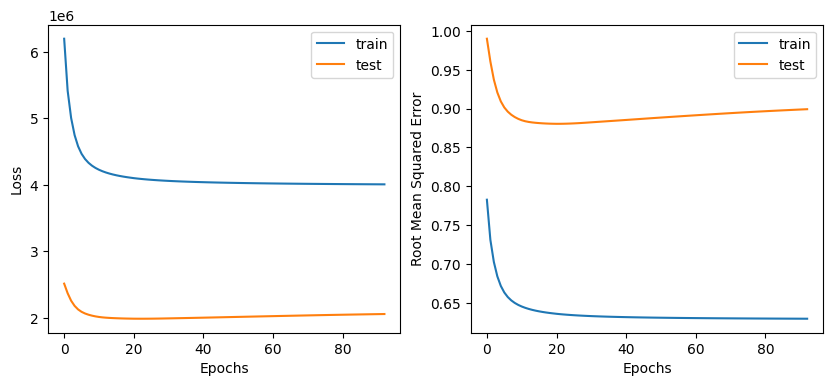

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(train_losses, label='train')
ax[0].plot(test_losses, label='test')
# ax[0].set_title('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(train_rmses, label='train')
ax[1].plot(test_rmses, label='test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Root Mean Squared Error')
# ax[1].set_title('Root Mean Squared Error')
ax[1].legend()
# plt.show()
plt.savefig('bias_training.pdf', bbox_inches='tight')

In [ ]:
params = {
    'user_biases':user_biases,
    'item_biases':item_biases,
    'n_epochs':n_epochs, 
    'lmb':lmb, 
    'gamma':gamma, 
    'tau':tau, 
    'k': k, 
    'U':U, 
    'V': V, 
    'train_rmses':train_rmses, 
    'train_losses':train_losses,
    'test_rmses': test_rmses,
    'test_losses': test_losses,
}

import pickle
import lzma
import datetime;
 
# ct stores current time
ct = datetime.datetime.now()

with lzma.open(f'params_k={k}_{ct}.xz', 'wb') as f:
    pickle.dump(params, f, protocol=4)